# **Lab Session 06 : MLP - Part1**

### **Exercise 0: Check python and scikit-learn version**

We are going to use python and scikit-learn version installed in colab by default.

* **python version** : 3.10.12
* **scikit-learn version** : 1.2.2


In [1]:
!python --version

Python 3.10.12


In [3]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [6]:
# Also, you can check the version of library like below.
import sklearn
print(sklearn.__version__)


1.2.2


---
### **Exercise 1: Check Tensorﬂow 2 version**


(This exercise is based on the example in Section "*Installing Tensorﬂow 2*" on in the textbook.)

We'll also be using tensorflow version installed in colab by default.

Just check the existence of tensorﬂow and its version.

* **tensorflow version** : 2.14.0



In [5]:
! pip show tensorflow

Name: tensorflow
Version: 2.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


In [7]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.14.0




---






### **Exercise 2: Building an Image Classiﬁer Using Sequential API**


( This exercise is based on the example in Section "*Building an Image Classiﬁer Using Sequential API*" in the textbook.)

Keras provides some utility functions to fetch and load common datasets.

Let’s load a dataset called "***Fashion MNIST***".


> * Fahsion MNIST dataset samples

<img src="https://drive.google.com/uc?export=download&id=1f0XYecMD-jl5K4xaVbCZHxvVAdoOD5Kj" width="600" />

In [8]:
# Load fashion_mnist dataset from keras.datasets
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


*You can check the shape and the data type of the dataset.*

In [9]:
# Check the shape of the dataset.
# output : ( number of images in the dataset , width of the image , height of the image)
X_train_full.shape

(60000, 28, 28)

In [10]:
# Check the data type of the dataset.
X_train_full.dtype

dtype('uint8')

Note that the dataset is already split into a training set and a test set, but there is no validation set, so we’ll create one now.

In [11]:
# Split train dataset(train_full) into train dataset(train) and validation dataset(valid) to create validation dataset.
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

You can assign the class name to the labels in "***Fashion MNIST***".

In [12]:
# Assign the class name to the labels in Fashion MNIST.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
y_train[0]

4

In [14]:
class_names[y_train[0]]

'Coat'



---

### **Exercise 3: Creating the model using the Sequential API**

( This exercise is based on the example in Section "*Creating the model using the Sequential API*" in the textbook. )

Creating model consists of the following two steps.

1. Create a Sequential model

2. Add some layers.

There are two types of layers:

> *   ***Flatten***: convert an input image into a 1D array.
> *   ***Dense***: create a layer that contains all connections between the neurons in the layer and the
previous layer.




In [16]:
from keras.src.layers.attention.multi_head_attention import activation
# 1. Create a Sequential model
model = keras.models.Sequential()

# 2. Add some layers.
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


*You can see the information of the model by the following command.*

In [17]:
# Check the information of the model using "summary()" method.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


*You can find out the information of the layers in the model by the following commands.*

In [18]:
# Check the information of the layers in the model.
model.layers

In [19]:
# Check the second layer in the model.
hidden1 = model.layers[1]
print(hidden1.name)

dense


In [20]:
# Is the layer object of hidden1 'dense'?
model.get_layer('dense') is hidden1

True

*All parameters of layers can be accessed by using a member function called* `get_weights()`.

In [21]:
# Check parameters(weights, biases) of hidden1 layer.
weights, biases = hidden1.get_weights()
print(weights)

[[ 0.01629543 -0.04309358  0.06195757 ...  0.03772004  0.0481788
  -0.06288762]
 [ 0.05813099  0.05035129  0.07240154 ...  0.06918398 -0.06532958
  -0.04562376]
 [-0.02138568 -0.02601765 -0.00760902 ...  0.05687924  0.06970282
   0.00875176]
 ...
 [-0.05605811  0.009038   -0.03864871 ...  0.02924133 -0.00273459
   0.04422666]
 [-0.04147648 -0.01208565 -0.01660414 ... -0.05891041 -0.06110566
  -0.0601312 ]
 [ 0.06583713 -0.06084238  0.02198509 ... -0.055517    0.03181855
   0.07388824]]


In [22]:
# Check weights array shape.
weights.shape

(784, 300)

In [23]:
# Check biases array shape.
biases.shape

(300,)



---

### **Exercise 4: Train the model**


( This exercise is based on the examples in Section "*Compiling the model, Training and evaluating the model*" in the textbook. )

After the model is created, you can specify the loss function and the optimizer by a member function called `compile()`.




In [24]:
# Specify the loss function and the optimizer using "complie()" method.
# We will use "sparse categorical cross-entropy" as loss function, and "stochastic gradient descent (sgd)" as optimizer.
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])


`fit()` *will train the model.*

Training history is saved in 'history' variable.

In [25]:
# Train the model using 'fit()' method.
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7370 - accuracy: 0.7575 - val_loss: 0.5159 - val_accuracy: 0.8236
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4886 - accuracy: 0.8304 - val_loss: 0.4505 - val_accuracy: 0.8488
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4407 - accuracy: 0.8473 - val_loss: 0.4158 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4133 - accuracy: 0.8558 - val_loss: 0.3884 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3930 - accuracy: 0.8636 - val_loss: 0.3798 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3770 - accuracy: 0.8681 - val_loss: 0.3713 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3644 - accuracy: 0.8721 - val_loss: 0.3633 - val_accura

By using `pandas`, you can plot the loss, the accuracy, the validation loss, and the validation accuracy in each epoch.

You can show these information in a graph.

In [26]:
# Import numpy, pandas and matplotlib library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

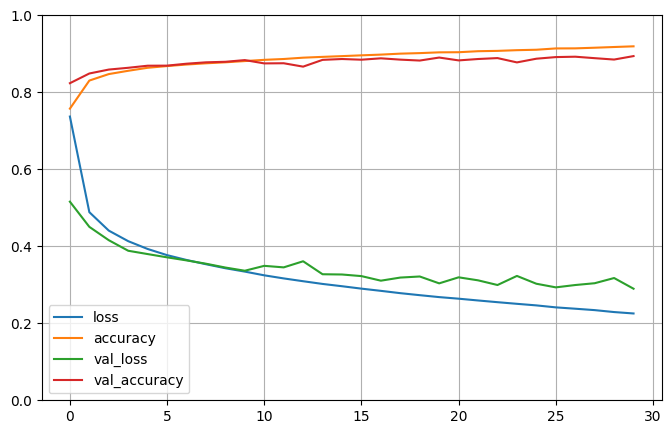

In [27]:
# Plot training history using 'history' variable.
pd.DataFrame(history.history).plot(figsize=(8,5))

# Draw grid on the background of the plot.
plt.grid(True)

# Scailing axis(: y) to [0, 1]
plt.gca().set_ylim(0,1)

# Show the plot.
plt.show()

---
### **Exercise 5: Evaluate the model and make a prediction**

( This exercise is based on the example in Section "*Training and evaluating the model, Using the model to make a prediction*" in the textbook. )

(💡TIP) : If you are not satisﬁed with the performance of the model, you can change the *hyperparameter* of the model.

After tuning, you should evaluate the model to estimate the generalization error by using a member function called `evaluate()`.


In [28]:
# Evaluate the model using test dataset.
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 56.5375 - accuracy: 0.8550


[56.53749465942383, 0.8550000190734863]

The first three instances of the test data will be used for prediction.

As you can see, for each instance the model estimates one probability per class, from class 0 to class 9.

For example, for the ﬁrst image it estimates that the probability of class 9 is 100% and the probabilities of the other classes are negligible.

In [29]:
# Get first three instances of the X_test to use for prediction.
X_new = X_test[:3]
# Predict y (probability) using trained model
y_proba = model.predict(X_new)
y_proba.round(2)


1/1 [==============================] - 0s 199ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

If you only care about the class with the highest estimated probability (even if that probability is quite low),

then you can use the `predict_classes()` method

In [30]:
# Predict probability using trained model
y_proba = model.predict(X_new)
# Get the value(class) with the highest probability.
y_pred = np.argmax(y_proba, axis=1)
print(y_pred)


1/1 [==============================] - 0s 21ms/step
[9 2 1]


In [31]:
import numpy as np
print(np.array(class_names)[y_pred])

['Ankle boot' 'Pullover' 'Trouser']


*You can also see class name of the predicted output.*

In [32]:
# Assign the class index to class name using class_names list defined above.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

*y_test is the true class of x_test, so the same output of y_pred and y_new means that the model is exact.*

In [34]:
# Get first three instances of the y_test to check true class of X_new
y_new = y_test[:3]
print(y_new)
print(np.array(class_names)[y_new])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']




---


### **Exercise 6: Building Regression MLP Using Sequential API**

( This exercise is based on the example in Section "*Building Regression MLP Using Sequential API*" in the textbook. )

Let’s consider the **California housing dataset** and model it by regression.

> * California housing dataset samples


<img src='https://drive.google.com/uc?id=1FJbZrKU2p7dpNyhXiOPTmGRX_VUTOqBq' width=800/>



In [35]:
# Import fetch_california_housing, train_test_split, StandardScaler from sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
# Load California housing dataset from 'fetch_california_housing()'.
housing = fetch_california_housing()

*After loading the data, we split it into a training set, a validation set, and a test set, and we scale all the features.*

In [37]:
# Split the dataset into train set(train_full) and test set(test).
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)
# Split the train set(train_full) into train set(train) and validation set(valid)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)
# Every columns in the dataset have different scale, so we will apply standardization(표준화) to the dataset with mean=0, variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Using the Sequential API to build, train, evaluate, and use a regression MLP to make predictions is quite similar to what we did for classiﬁcation class (in Fashion MNIST).

* The differences are:
  * The output layer has a single neuron.
  * Mean squared error is used in the loss function.
  * Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons in order to avoid overﬁtting.

In [38]:
# Define the model with dense layers.
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu",
                                                    input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)])

# Complie the model with mean squared error(mse) as loss function and stocastic gradient descent(sgd) as optimizer.
model.compile(loss="mean_squared_error", optimizer="sgd")


In [39]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8335 - val_loss: 0.5085
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5069 - val_loss: 0.4542
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5024 - val_loss: 0.4495
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4813 - val_loss: 0.4289
Epoch 5/20
363/363 [==============================] - 2s 7ms/step - loss: 0.4606 - val_loss: 0.4107
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4429 - val_loss: 0.4045
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4401 - val_loss: 0.4044
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4322 - val_loss: 0.3928
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4655 - val_loss: 0.3952
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4313 - val_loss: 0.4381

In [40]:
# Evaluate the model using test dataset
mse_test = model.evaluate(X_test, y_test)
print('MSE score: ', mse_test)

162/162 [==============================] - 1s 5ms/step - loss: 0.3804
MSE score:  0.38039013743400574


In [41]:
# Get first three instances of the X_test to use for prediction.
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred.round(2))

1/1 [==============================] - 0s 76ms/step
[[1.1 ]
 [1.48]
 [2.99]]




---


### **Exercise 7: Building Complex Models Using the Functional API**

( This exercise is based on the example in Section "*Building Complex Models Using the Functional API*" in the textbook. )

A **Wide & Deep neural network** is one example of nonsequential neural networks.

**It connects all or part of the inputs directly to the output layer.**

1. Create a "`Input`" object.

2. Create two "`Dense`" layers with 30 neurons.

3. Create a concatenate layer "`concat`" to concatenate the input and the output of the second hidden layer.

4. Create an "`output`" layer.

5. Create a model.

In [42]:
# Practice to build complex model using functional API
### 1. Create a "input" object
input_ = keras.layers.Input(shape=X_train.shape[1:])
### 2. Create two "Dense" layers with 30 neurons.
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

### 3. Create a concatenate layer "concat" to concatenate the input and the output of the second hidden layer.
concat = keras.layers.Concatenate()([input_, hidden2])

### 4. Create an "output" layer.
output = keras.layers.Dense(1)(concat)

### 5. Create a model.
model_sample = keras.Model(inputs=[input_], outputs=[output])

*The input layer could contain a subset of features of the entire input dataset. ( You can check the figure in the textbook. )*

In [43]:
# Define a input layer(variable name= 'input_A')(layer name= "wide_input"). Input shape of the input layer is 1D array with 5 features(columns).
input_A = keras.layers.Input(shape=[5], name="wide_input")

# Define a input layer(variable name= 'input_B')(layer name= "deep_input"). Input shape of the input layer is 1D array with 6 features(columns).
input_B = keras.layers.Input(shape=[6], name="deep_input")

# Define a hidden layer(hidden1) with 30 hidden units. The hidden layer takes input from 'input_B' (input_B -> hidden1)
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)

# Define another hidden layer(hidden2) with 30 hidden units. The hidden layer takes input from 'hidden1' (hidden1 -> hidden2)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Concat 'input_A' and 'hidden2' to be model structure like (input_A -> hidden2)
concat = keras.layers.concatenate([input_A, hidden2])

# Define output layer with 1 hidden unit. The output layer get input from 'concat'. (concat -> output)
output = keras.layers.Dense(1, name="output")(concat)

# Create model that takes inputs from both 'input_A' and 'input_B', and return output from 'output'
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

*Compile and train the complex model.*

In [45]:
# Compile the model using 'mse' as loss function and 'sgd' as optimizer.
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

Do you remember that California housing dataset consist of total 9 columns(features)?

* But 'input_A' takes input like 1D array with 5 features, so we need to create dataset (train_A) consisting of the five columns.

* Similarly, we need to create dataset (train_B) consisting of the six columns to fit input format of 'input_B'

(💡NOTE) : X_train[:, :5] means that only the last 5 columns are fetched for every row.

(💡NOTE) : X_train[:, 2:] means to get the columns from after the second column to the last column for every rows.

In [46]:
# Split dataset to fit each input format of 'input_A' and 'input_B'.
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

# Check the number of features of 'X_train_A' and 'X_train_B' respectively.
print("The number of columns in X_train_A: ", len(X_train_A[0]))
print("The number of columns in X_train_B: ", len(X_train_B[0]))

The number of columns in X_train_A:  5
The number of columns in X_train_B:  6


In [47]:
# Train the model
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 0.8899 - val_loss: 0.5878
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5818 - val_loss: 0.5379
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6204 - val_loss: 0.4905
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5429 - val_loss: 0.4610
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4989 - val_loss: 0.4418
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4871 - val_loss: 0.4367
Epoch 7/20
363/363 [==============================] - 5s 13ms/step - loss: 0.4722 - val_loss: 0.4244
Epoch 8/20
363/363 [==============================] - 2s 7ms/step - loss: 0.4644 - val_loss: 0.4161
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4484 - val_loss: 0.4033
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4583 - val_loss: 0.398

In [49]:
# Evaluate the trained model
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
print("score: ", mse_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.3733
score:  0.373269647359848


In [50]:
# Predict y using the trained model
y_pred = model.predict((X_new_A, X_new_B))
print(y_pred)

1/1 [==============================] - 0s 78ms/step
[[1.063956 ]
 [1.7331585]
 [2.6560872]]


There are many use cases in which you may want to have **multiple outputs**:
- The task may demand it (e.g., regression and classiﬁcation).
- Simiarly, you may have multiple independent tasks based on the same data.
- Regularization technique.


Adding extra outputs is quite easy:
just connect them to the appropriate layers and add them to your model's list of outputs.

In [51]:
# We reuse input layers and hidden layers defined above, so we only need to define new output layers to return multiple outputs.
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
# Create model using new output layers.
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [52]:
# Complie the model using 'mse' as loss function for each output and 'sgd' as optimizer.
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

# Train the model.
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 0.7472 - main_output_loss: 0.6521 - aux_output_loss: 1.6033 - val_loss: 0.4752 - val_main_output_loss: 0.4250 - val_aux_output_loss: 0.9279
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4865 - main_output_loss: 0.4456 - aux_output_loss: 0.8541 - val_loss: 0.4276 - val_main_output_loss: 0.3942 - val_aux_output_loss: 0.7279
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4577 - main_output_loss: 0.4283 - aux_output_loss: 0.7222 - val_loss: 0.4156 - val_main_output_loss: 0.3885 - val_aux_output_loss: 0.6597
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4400 - main_output_loss: 0.4148 - aux_output_loss: 0.6662 - val_loss: 0.4037 - val_main_output_loss: 0.3817 - val_aux_output_loss: 0.6023
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4275 - main_output_loss: 0.4054 - aux_output_loss: 0.6259 - val_loss

In [53]:
# Evaluate the model and check each loss.

total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
print('total loss: {}₩nmain loss: {}₩naux loss: {}'.format(total_loss, main_loss, aux_loss))

162/162 [==============================] - 0s 3ms/step - loss: 0.3576 - main_output_loss: 0.3448 - aux_output_loss: 0.4723
total loss: 0.35759425163269043₩nmain loss: 0.34484779834747314₩naux loss: 0.47231218218803406


In [55]:
# Predict the model for X_new_A and X_new_B.
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
print('output of `main_output layer` : \n', y_pred_main)
print('output of `aux_output layer` : \n', y_pred_aux)

1/1 [==============================] - 0s 35ms/step
output of `main_output layer` : 
 [[1.0327017]
 [1.6487103]
 [2.727264 ]]
output of `aux_output layer` : 
 [[1.0823263]
 [1.386531 ]
 [2.772372 ]]
